In [148]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Act 3.3 valores nulos barcelona.csv') 

In [150]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  18927 non-null  int64  
 1   Unnamed: 0                    18927 non-null  int64  
 2   id                            18927 non-null  int64  
 3   scrape_id                     18927 non-null  int64  
 4   host_id                       18927 non-null  int64  
 5   latitude                      18927 non-null  float64
 6   longitude                     18927 non-null  float64
 7   neighbourhood_cleansed        18927 non-null  object 
 8   neighbourhood_group_cleansed  18927 non-null  object 
 9   property_type                 18927 non-null  object 
 10  room_type                     18927 non-null  object 
 11  host_since                    18927 non-null  object 
 12  host_location                 18927 non-null  object 
 13  h

In [151]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0.1                       0
Unnamed: 0                         0
id                                 0
scrape_id                          0
host_id                            0
latitude                           0
longitude                          0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
host_since                         0
host_location                      0
host_response_time                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
host_listings_count                0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
accommodates                       0
bathrooms                          0
bathrooms_text                     0
bedrooms                           0
beds                               0
amenities                          0
p

In [152]:
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['Unnamed: 0.1'])
data = data.drop(columns=['id'])
data = data.drop(columns=['scrape_id'])
data = data.drop(columns=['host_id'])

In [153]:
data["host_response_rate"] = data["host_response_rate"].str.replace("%", "", regex=False).astype(float)
data["host_response_rate"] = data["host_response_rate"].astype(float)

In [154]:
data["price"] = data["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas
data["price"] = data["price"].astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/dh/cmb1ntws385frzlj801tcrjc0000gn/T/ipykernel_7954/145616731.py:1: SyntaxWarning: invalid escape sequence '\$'
  data["price"] = data["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas


In [155]:
# 🔹 Selección manual de columnas (según criterio personal)
mis_cuantitativas = ["host_response_rate", "host_listings_count", "host_total_listings_count","bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights","maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights","accommodates","bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30","availability_60",	"availability_90",	"availability_365",	"availability_eoy",	"number_of_reviews","number_of_reviews_ltm","number_of_reviews_l30d","number_of_reviews_ly","reviews_per_month","review_scores_rating",	"review_scores_accuracy","review_scores_cleanliness","review_scores_communication",	"review_scores_location"]   # Cambia según tus columnas
mis_cualitativas = ["latitude", "longitude", "neighbourhood_cleansed", "property_type", "room_type", "host_since", "host_location", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "bathrooms_text",
                    "amenities"] # Cambia según tus columnas

# Filtramos el DataFrame usando las listas
cuantitativas = data[mis_cuantitativas]
cualitativas = data[mis_cualitativas]

# Mostramos resultados
print("Columnas cuantitativas seleccionadas:")
print(cuantitativas.dtypes)

print("\nColumnas cualitativas seleccionadas:")
print(cualitativas.dtypes)

Columnas cuantitativas seleccionadas:
host_response_rate             float64
host_listings_count            float64
host_total_listings_count      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
minimum_minimum_nights         float64
maximum_minimum_nights         float64
minimum_maximum_nights         float64
maximum_maximum_nights         float64
accommodates                     int64
bathrooms                      float64
minimum_nights_avg_ntm         float64
maximum_nights_avg_ntm         float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
availability_eoy                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
number_of_reviews_ly      

In [156]:
print(cuantitativas.dtypes)

host_response_rate             float64
host_listings_count            float64
host_total_listings_count      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
minimum_minimum_nights         float64
maximum_minimum_nights         float64
minimum_maximum_nights         float64
maximum_maximum_nights         float64
accommodates                     int64
bathrooms                      float64
minimum_nights_avg_ntm         float64
maximum_nights_avg_ntm         float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
availability_eoy                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
number_of_reviews_ly             int64
reviews_per_month        

In [157]:
print("\nColumnas cualitativas:")
print(cualitativas.dtypes)


Columnas cualitativas:
latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
dtype: object


<Figure size 1500x800 with 0 Axes>

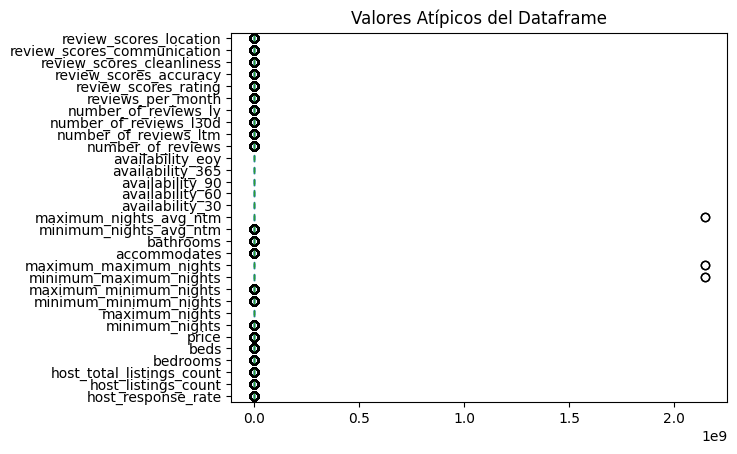

In [158]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**


In [159]:
#Método aplicando desviación estandar. Encuentro los valores extremos

#ESTE MÉTODO CONSIDERA MENOS ATÍPICOS


y=cuantitativas
Limite_Superior= y.mean() + 3*y.std() #SE AGREGAN 3 DESVIACIONES ESTANDAR 
Limite_Inferior= y.mean() - 3*y.std() #SE RESTAN 3 STV PARA ASEGURAR EL 95.5% DE LA INFO.
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate             1.440894e+02
host_listings_count            6.032539e+02
host_total_listings_count      7.260175e+02
bedrooms                       5.841367e+00
beds                           8.835612e+00
price                          1.370588e+03
minimum_nights                 1.054445e+02
maximum_nights                 1.720753e+03
minimum_minimum_nights         9.241182e+01
maximum_minimum_nights         2.068142e+02
minimum_maximum_nights         6.645825e+07
maximum_maximum_nights         6.645831e+07
accommodates                   1.020081e+01
bathrooms                      3.984821e+00
minimum_nights_avg_ntm         1.627076e+02
maximum_nights_avg_ntm         6.645123e+07
availability_30                4.032269e+01
availability_60                8.649867e+01
availability_90                1.348366e+02
availability_365               5.673466e+02
availability_eoy               3.046552e+02
number_of_reviews              3.670963e+02
number

In [160]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
#CONDICIÓN PARA ELIMINAR LOS OUTLIERS FUERA DE LOS LÍMITES
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,147.0,26.0,0.0,37.0,0.87,4.46,4.44,4.38,4.89,4.89
3,80.0,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,356.0,565.0,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.00,3.67,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,224.0,262.0,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18923,100.0,224.0,262.0,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18924,100.0,224.0,262.0,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18925,100.0,224.0,262.0,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80


In [161]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

host_response_rate              583
host_listings_count             542
host_total_listings_count       551
bedrooms                        264
beds                            215
price                          4167
minimum_nights                   93
maximum_nights                    0
minimum_minimum_nights           98
maximum_minimum_nights          319
minimum_maximum_nights            6
maximum_maximum_nights            6
accommodates                    230
bathrooms                       308
minimum_nights_avg_ntm          203
maximum_nights_avg_ntm            2
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
availability_eoy                  0
number_of_reviews               467
number_of_reviews_ltm           226
number_of_reviews_l30d          161
number_of_reviews_ly            240
reviews_per_month              5152
review_scores_rating           5344
review_scores_accuracy      

In [162]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum().sum()
valores_nulos

np.int64(20598)

In [163]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,147.0,26.0,0.0,37.0,0.87,4.46,4.44,4.38,4.89,4.89
3,80.0,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,356.0,565.0,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.00,3.67,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,224.0,262.0,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18923,100.0,224.0,262.0,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18924,100.0,224.0,262.0,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18925,100.0,224.0,262.0,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80


In [164]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_response_rate             0
host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
availability_eoy               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
number_of_reviews_ly           0
reviews_per_month              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_communication    0
review_sco

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**


In [165]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate              110.500
host_listings_count             114.500
host_total_listings_count       203.000
bedrooms                          3.500
beds                              6.000
price                           529.000
minimum_nights                   76.000
maximum_nights                 2317.500
minimum_minimum_nights           76.000
maximum_minimum_nights           75.500
minimum_maximum_nights         2410.500
maximum_maximum_nights         2317.500
accommodates                      7.000
bathrooms                         3.500
minimum_nights_avg_ntm           75.000
maximum_nights_avg_ntm         2317.500
availability_30                  42.500
availability_60                 101.000
availability_90                 157.000
availability_365                650.000
availability_eoy                343.000
number_of_reviews               132.500
number_of_reviews_ltm            37.500
number_of_reviews_l30d            2.500
number_of_revi

In [166]:
data['host_listings_count'].unique()

array([4.400e+01, 6.000e+00, 3.000e+00, 5.000e+00, 3.560e+02, 1.500e+01,
       7.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.200e+01, 1.000e+01,
       8.000e+00, 2.200e+01, 7.900e+01, 4.600e+01, 1.130e+02, 5.300e+01,
       4.700e+01, 2.900e+01, 1.400e+01, 2.000e+01, 1.600e+01, 1.280e+02,
       2.800e+01, 1.100e+01, 3.300e+01, 9.000e+00, 4.100e+01, 1.800e+01,
       1.300e+01, 3.400e+01, 2.100e+01, 3.500e+01, 2.300e+01, 2.700e+01,
       3.600e+01, 1.700e+01, 6.000e+01, 3.000e+01, 3.100e+01, 2.400e+01,
       3.320e+02, 4.200e+01, 7.200e+01, 1.900e+01, 1.220e+02, 2.240e+02,
       1.290e+02, 6.100e+01, 2.410e+02, 7.000e+01, 1.420e+02, 3.800e+01,
       2.500e+01, 4.000e+01, 1.230e+02, 3.200e+01, 1.830e+02, 2.220e+02,
       1.520e+02, 4.300e+01, 1.300e+02, 5.000e+01, 3.290e+02, 1.660e+02,
       6.900e+01, 7.600e+01, 2.600e+01, 6.200e+01, 7.300e+01, 9.030e+02,
       4.460e+02, 6.300e+01, 5.900e+01, 3.900e+01, 1.310e+02, 1.410e+02,
       5.020e+02, 1.710e+02, 4.800e+01, 1.120e+02, 

In [167]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,NaN,26.0,0.0,NaN,0.87,4.46,4.44,4.38,4.89,4.89
3,NaN,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,NaN,NaN,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,NaN,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,NaN,NaN,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18923,100.0,NaN,NaN,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18924,100.0,NaN,NaN,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18925,100.0,NaN,NaN,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80


In [168]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_response_rate             2365
host_listings_count            3717
host_total_listings_count      2642
bedrooms                       1249
beds                            541
price                          4675
minimum_nights                  196
maximum_nights                    0
minimum_minimum_nights          181
maximum_minimum_nights          722
minimum_maximum_nights            6
maximum_maximum_nights            6
accommodates                    972
bathrooms                       308
minimum_nights_avg_ntm          359
maximum_nights_avg_ntm            2
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
availability_eoy                  0
number_of_reviews              2337
number_of_reviews_ltm          1937
number_of_reviews_l30d         2966
number_of_reviews_ly           2618
reviews_per_month              5498
review_scores_rating           5640
review_scores_accuracy      

In [169]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum().sum()
valores_nulos

np.int64(45195)

In [170]:
data4_iqr = data3_iqr.copy()

# Columnas a rellenar con la mediana
cols_mediana = ["host_listings_count", "host_total_listings_count","bedrooms", "beds", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "accommodates", "bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly", "reviews_per_month"]
data4_iqr[cols_mediana] = data4_iqr[cols_mediana].fillna(data4_iqr[cols_mediana].median().round(1))


In [171]:
data4_iqr['host_listings_count'].value_counts()

host_listings_count
5.0     4343
1.0     4016
2.0     1659
3.0     1050
4.0      738
        ... 
48.0      22
66.0       6
99.0       3
85.0       1
54.0       1
Name: count, Length: 68, dtype: int64

In [172]:
excluir = ["host_listings_count", "host_total_listings_count","bedrooms", "beds", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "accommodates", "bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly", "reviews_per_month"]

# Selección de todas las numéricas excepto las excluidas
cols_media = data4_iqr.select_dtypes(include="number").columns.difference(excluir)

# Rellenar esas columnas con la media
data4_iqr[cols_media] = data4_iqr[cols_media].fillna(data4_iqr[cols_media].mean().round(1))


In [173]:
data4_iqr['host_listings_count'].unique()

array([ 44.,   6.,   3.,   5.,  15.,   7.,   1.,   2.,   4.,  12.,  10.,
         8.,  22.,  79.,  46., 113.,  53.,  47.,  29.,  14.,  20.,  16.,
        28.,  11.,  33.,   9.,  41.,  18.,  13.,  34.,  21.,  35.,  23.,
        27.,  36.,  17.,  60.,  30.,  31.,  24.,  42.,  72.,  19.,  61.,
        70.,  38.,  25.,  40.,  32.,  43.,  50.,  69.,  76.,  26.,  62.,
        73.,  63.,  59.,  39.,  48., 112.,  45.,  66.,  99.,  37., 101.,
        85.,  54.])

In [174]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,19.4,26.0,0.0,3.8,0.87,4.46,4.44,4.38,4.89,4.89
3,98.0,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,13.7,30.1,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.80,4.80,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,13.7,30.1,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18923,100.0,13.7,30.1,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18924,100.0,13.7,30.1,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18925,100.0,13.7,30.1,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80


In [175]:
data4_iqr['beds'].unique()

array([6. , 4. , 3. , 1. , 1.8, 2. , 0. , 5. ])

In [176]:
data4_iqr['host_listings_count'].unique()

array([ 44. ,   6. ,   3. ,   5. ,  13.7,  15. ,   7. ,   1. ,   2. ,
         4. ,  12. ,  10. ,   8. ,  22. ,  79. ,  46. , 113. ,  53. ,
        47. ,  29. ,  14. ,  20. ,  16. ,  28. ,  11. ,  33. ,   9. ,
        41. ,  18. ,  13. ,  34. ,  21. ,  35. ,  23. ,  27. ,  36. ,
        17. ,  60. ,  30. ,  31. ,  24. ,  42. ,  72. ,  19. ,  61. ,
        70. ,  38. ,  25. ,  40. ,  32. ,  43. ,  50. ,  69. ,  76. ,
        26. ,  62. ,  73. ,  63. ,  59. ,  39. ,  48. , 112. ,  45. ,
        66. ,  99. ,  37. , 101. ,  85. ,  54. ])

In [177]:
data4_iqr['host_total_listings_count'].unique()

array([ 46. ,   9. ,  15. ,   5. ,  30.1,  34. ,  11. ,   2. ,   3. ,
        17. ,   4. ,  20. ,   1. ,   6. ,  16. ,   7. ,  18. ,  13. ,
        14. ,  10. ,  27. ,   8. ,  90. ,  47. , 127. , 111. , 161. ,
       128. ,  23. ,  12. ,  44. , 130. ,  94. ,  52. ,  25. ,  57. ,
        22. ,  19. ,  21. ,  30. ,  37. ,  42. ,  29. , 114. ,  78. ,
       104. ,  54. ,  38. ,  81. , 100. , 112. ,  65. ,  51. ,  35. ,
        24. ,  40. ,  50. ,  77. ,  83. ,  41. ,  28. , 102. , 163. ,
        91. ,  61. ,  31. , 143. ,  55. ,  43. , 186. ,  72. ,  36. ,
        45. ,  39. ,  33. ,  53. ,  73. ,  67. ,  75. , 113. , 171. ,
        32. ,  63. ,  93. ,  26. ,  88. ,  68. , 175. ,  74. , 110. ,
       105. , 140. ,  48. , 129. ,  59. ,  70. ,  64. , 158. ,  89. ,
       157. ,  71. , 183. , 176. , 199. , 118. , 125. ,  69. , 148. ,
        80. ,  97. , 121. ,  85. ,  99. ,  60. ,  58. ])

In [178]:
data4_iqr['number_of_reviews'].unique()

array([ 48. ,  88. ,  19.4,  25. ,   3. , 108. ,  32. ,   5. ,   9. ,
       111. ,  93. ,   1. ,  84. ,  10. ,  11. , 112. , 115. ,   7. ,
       122. , 116. ,  54. ,  41. ,  98. , 121. ,  90. ,   0. , 109. ,
        13. ,   8. ,   4. ,  86. ,  37. ,  39. ,  72. ,  28. ,  43. ,
        95. ,  59. ,  87. ,  44. , 132. ,   2. ,  52. ,  45. , 101. ,
        92. ,  53. ,  74. ,  63. ,  35. ,  61. , 127. , 100. ,  38. ,
       120. ,  27. ,  75. ,  17. ,  96. ,  55. ,  19. ,  78. ,  30. ,
        85. ,  21. ,  50. ,  36. ,  82. ,  62. ,  51. , 104. ,  20. ,
        65. ,  46. ,  70. ,  60. ,  15. ,  94. ,  49. ,  77. ,  99. ,
         6. ,  89. ,  40. ,  81. , 119. ,  22. ,  14. ,  73. ,  12. ,
        79. , 124. ,  58. ,  18. ,  76. ,  64. ,  97. ,  68. ,  33. ,
        91. ,  56. ,  16. , 128. , 114. ,  26. , 130. , 113. ,  80. ,
        66. , 117. , 102. ,  83. ,  31. ,  29. ,  24. ,  34. ,  67. ,
       118. ,  71. , 131. , 110. , 129. , 107. , 105. ,  47. ,  42. ,
       126. ,  69. ,

In [179]:
data4_iqr['number_of_reviews_ly'].unique()

array([ 5. ,  7. ,  3.8, 17. ,  1. , 13. ,  2. ,  0. ,  3. ,  8. , 27. ,
       19. , 23. , 10. , 18. ,  6. , 25. , 21. ,  4. , 30. , 26. , 14. ,
       24. , 20. , 28. , 29. , 22. , 16. ,  9. , 15. , 11. , 12. ])

In [180]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

host_response_rate             0
host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
availability_eoy               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
number_of_reviews_ly           0
reviews_per_month              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_communication    0
review_sco

<Figure size 1500x800 with 0 Axes>

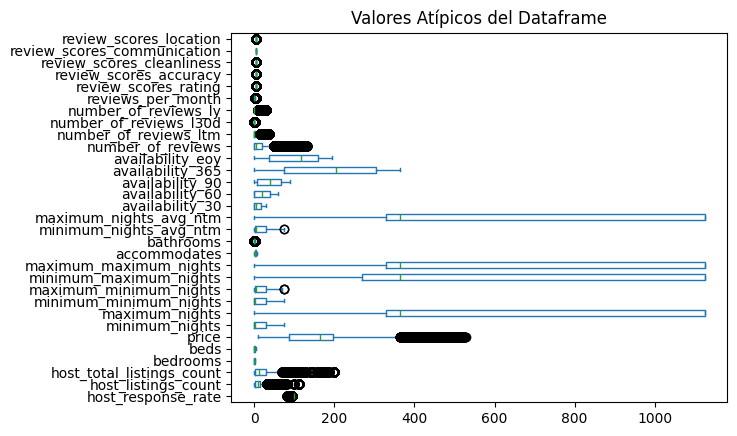

In [181]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
data4_iqr.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [182]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios_iqr = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios_iqr

,latitude,longitude,neighbourhood_cleansed,property_type,room_type,host_since,host_location,host_response_time,host_is_superhost,host_has_profile_pic,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,41.405560,2.172620,la Sagrada Família,Entire rental unit,Entire home/apt,2010-01-19,"Barcelona, Spain",within an hour,f,t,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,41.412432,2.219750,el Besòs i el Maresme,Entire rental unit,Entire home/apt,2010-03-09,"Catalonia, Spain",within an hour,t,t,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,41.405660,2.170150,el Camp d'en Grassot i Gràcia Nova,Entire rental unit,Entire home/apt,2010-05-31,"Barcelona, Spain",within an hour,f,t,...,19.4,26.0,0.0,3.8,0.87,4.46,4.44,4.38,4.89,4.89
3,41.380620,2.175170,el Barri Gòtic,Entire condo,Entire home/apt,2010-01-24,"Barcelona, Spain",within an hour,f,t,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,41.376400,2.191020,la Barceloneta,Entire rental unit,Entire home/apt,2011-11-27,"Barcelona, Spain",within an hour,f,t,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.80,4.80,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,41.399220,2.178950,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18923,41.399790,2.180350,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18924,41.399390,2.180520,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18925,41.400813,2.180756,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80


In [183]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios_iqr.isnull().sum()
valores_nulos

latitude                       0
longitude                      0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
host_since                     0
host_location                  0
host_response_time             0
host_is_superhost              0
host_has_profile_pic           0
host_identity_verified         0
bathrooms_text                 0
amenities                      0
host_response_rate             0
host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availabili

He optado por aplicar el método de los cuartiles, ya que se adapta de manera robusta a mi base de datos, permitiendo identificar y tratar valores atípicos sin que los resultados se vean afectados por extremos. Esto nos asegura un conjunto de datos más limpio, representativo y confiable para el análisis posterior.

In [184]:
#Convertir DataFrame a CSV
Datos_limpios_iqr.to_csv("Act 4.2 Sin valores atipicos.csv")

VALORES ATIPICOS MÉXICO

In [185]:
df = pd.read_csv('MÉXICO_CLEAN.csv')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26401 non-null  int64  
 1   id                           26401 non-null  int64  
 2   scrape_id                    26401 non-null  int64  
 3   host_id                      26401 non-null  int64  
 4   latitude                     26401 non-null  float64
 5   longitude                    26401 non-null  float64
 6   neighbourhood_cleansed       26401 non-null  object 
 7   property_type                26401 non-null  object 
 8   room_type                    26401 non-null  object 
 9   host_since                   25487 non-null  object 
 10  host_location                26401 non-null  object 
 11  host_response_time           26400 non-null  object 
 12  host_response_rate           26401 non-null  object 
 13  host_acceptance_

In [187]:
df['host_response_rate'].unique()   

array(['100%', '93%', '0%', '91%', '90%', '29%', '89%', '97%', '67%',
       '80%', '33%', '75%', '95%', '50%', '58%', '78%', '92%', '86%',
       '60%', '85%', '99%', '30%', '63%', '70%', '79%', '40%', '25%',
       '88%', '87%', '13%', '20%', '71%', '96%', '38%', '81%', '98%',
       '84%', '10%', '73%', '94%', '64%', '82%', '83%', '34%', '77%',
       '55%', '6%', '56%', '59%', '74%', '14%', '57%', '76%', '11%', '9%',
       '17%', '8%', '22%', '12%', '42%', '7%', '4%', '68%', '62%', '43%'],
      dtype=object)

In [188]:
valores_nulos=df.isnull().sum()
valores_nulos

Unnamed: 0                       0
id                               0
scrape_id                        0
host_id                          0
latitude                         0
longitude                        0
neighbourhood_cleansed           0
property_type                    0
room_type                        0
host_since                     914
host_location                    0
host_response_time               1
host_response_rate               0
host_acceptance_rate             0
host_is_superhost                0
host_listings_count            914
host_total_listings_count      914
host_has_profile_pic           914
host_identity_verified         914
accommodates                     0
bathrooms                        0
bathrooms_text                   0
bedrooms                         0
beds                             0
amenities                        0
price                            0
minimum_nights                   0
maximum_nights                   0
minimum_minimum_nigh

In [189]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['id'])
df = df.drop(columns=['scrape_id'])
df = df.drop(columns=['host_id'])

In [190]:
df["host_response_rate"] = df["host_response_rate"].str.replace("%", "", regex=False).astype(float)
df["host_response_rate"] = df["host_response_rate"].astype(float)

In [191]:
df['host_response_rate'].unique()  

array([100.,  93.,   0.,  91.,  90.,  29.,  89.,  97.,  67.,  80.,  33.,
        75.,  95.,  50.,  58.,  78.,  92.,  86.,  60.,  85.,  99.,  30.,
        63.,  70.,  79.,  40.,  25.,  88.,  87.,  13.,  20.,  71.,  96.,
        38.,  81.,  98.,  84.,  10.,  73.,  94.,  64.,  82.,  83.,  34.,
        77.,  55.,   6.,  56.,  59.,  74.,  14.,  57.,  76.,  11.,   9.,
        17.,   8.,  22.,  12.,  42.,   7.,   4.,  68.,  62.,  43.])

In [192]:
df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas
df["price"] = df["price"].astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/dh/cmb1ntws385frzlj801tcrjc0000gn/T/ipykernel_7954/3050528424.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas


In [193]:
mis_cuantitativas = [ "host_listings_count", "host_total_listings_count","bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights","maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights","accommodates","bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30","availability_60",	"availability_90",	"availability_365",	"availability_eoy",	"number_of_reviews","number_of_reviews_ltm","number_of_reviews_l30d","number_of_reviews_ly","reviews_per_month","review_scores_rating",	"review_scores_accuracy","review_scores_cleanliness","review_scores_communication",	"review_scores_location"]   # Cambia según tus columnas
mis_cualitativas = ["host_response_rate", "latitude", "longitude", "neighbourhood_cleansed", "property_type", "room_type", "host_since", "host_location", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "bathrooms_text",
                    "amenities", "has_availability"] # Cambia según tus columnas

cuantitativas = df[mis_cuantitativas]
cualitativas = df[mis_cualitativas]

# Mostramos resultados
print("Columnas cuantitativas seleccionadas:")
print(cuantitativas.dtypes)

print("\nColumnas cualitativas seleccionadas:")
print(cualitativas.dtypes)

Columnas cuantitativas seleccionadas:
host_listings_count            float64
host_total_listings_count      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
minimum_minimum_nights         float64
maximum_minimum_nights         float64
minimum_maximum_nights         float64
maximum_maximum_nights         float64
accommodates                     int64
bathrooms                      float64
minimum_nights_avg_ntm         float64
maximum_nights_avg_ntm         float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
availability_eoy                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
number_of_reviews_ly             int64
reviews_per_month         

In [194]:
print(cualitativas.dtypes)

host_response_rate        float64
latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
has_availability           object
dtype: object


In [195]:
print("\nColumnas cualitativas:")
print(cualitativas.dtypes)


Columnas cualitativas:
host_response_rate        float64
latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
has_availability           object
dtype: object


<Figure size 1500x800 with 0 Axes>

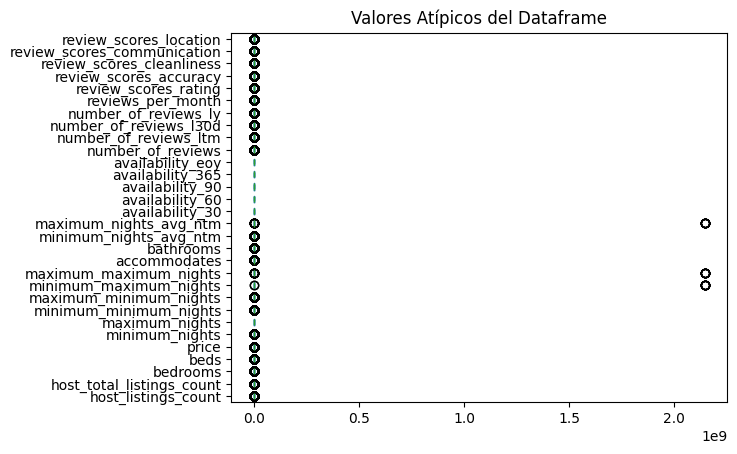

In [196]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [197]:
#Método aplicando desviación estandar. Encuentro los valores extremos

#ESTE MÉTODO CONSIDERA MENOS ATÍPICOS


y=cuantitativas
Limite_Superior= y.mean() + 3*y.std() #SE AGREGAN 3 DESVIACIONES ESTANDAR 
Limite_Inferior= y.mean() - 3*y.std() #SE RESTAN 3 STV PARA ASEGURAR EL 95.5% DE LA INFO.
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count            2.716502e+02
host_total_listings_count      3.799002e+02
bedrooms                       5.297220e+00
beds                           6.884432e+00
price                          5.372646e+04
minimum_nights                 8.172096e+01
maximum_nights                 1.700871e+03
minimum_minimum_nights         7.620238e+01
maximum_minimum_nights         8.241985e+01
minimum_maximum_nights         1.262245e+08
maximum_maximum_nights         1.262245e+08
accommodates                   1.034989e+01
bathrooms                      4.331277e+00
minimum_nights_avg_ntm         7.708809e+01
maximum_nights_avg_ntm         1.261764e+08
availability_30                5.033357e+01
availability_60                1.023114e+02
availability_90                1.542755e+02
availability_365               6.075196e+02
availability_eoy               3.193924e+02
number_of_reviews              3.007175e+02
number_of_reviews_ltm          8.390663e+01
number

In [198]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
#CONDICIÓN PARA ELIMINAR LOS OUTLIERS FUERA DE LOS LÍMITES
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,1.0,1.0,1.0,1.0,3799.0,1.0,7,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,13.0,13.0,5.0,NaN,18000.0,1.0,180,1.0,1.0,180.0,...,65.0,1.0,0.0,0.0,0.39,4.59,4.56,4.70,4.78,4.98
2,1.0,5.0,1.0,1.0,585.0,15.0,250,15.0,15.0,250.0,...,84.0,1.0,0.0,0.0,0.48,4.87,4.95,4.88,4.94,4.76
3,3.0,4.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,50.0,1.0,0.0,4.0,0.30,4.90,4.82,4.76,4.92,4.98
4,3.0,4.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,132.0,8.0,0.0,9.0,0.81,4.92,4.91,4.96,4.98,4.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,3.0,3.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,4.00
26397,23.0,27.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
26398,6.0,6.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
26399,1.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [199]:
cualitativas['host_response_rate'].unique()  

array([100.,  93.,   0.,  91.,  90.,  29.,  89.,  97.,  67.,  80.,  33.,
        75.,  95.,  50.,  58.,  78.,  92.,  86.,  60.,  85.,  99.,  30.,
        63.,  70.,  79.,  40.,  25.,  88.,  87.,  13.,  20.,  71.,  96.,
        38.,  81.,  98.,  84.,  10.,  73.,  94.,  64.,  82.,  83.,  34.,
        77.,  55.,   6.,  56.,  59.,  74.,  14.,  57.,  76.,  11.,   9.,
        17.,   8.,  22.,  12.,  42.,   7.,   4.,  68.,  62.,  43.])

In [200]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

host_listings_count            1369
host_total_listings_count      1415
bedrooms                        280
beds                            436
price                            27
minimum_nights                  198
maximum_nights                    0
minimum_minimum_nights          199
maximum_minimum_nights          254
minimum_maximum_nights           30
maximum_maximum_nights           30
accommodates                    502
bathrooms                       384
minimum_nights_avg_ntm          187
maximum_nights_avg_ntm           10
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
availability_eoy                  0
number_of_reviews               594
number_of_reviews_ltm           388
number_of_reviews_l30d          309
number_of_reviews_ly            412
reviews_per_month               325
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness   

In [201]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum().sum()
valores_nulos

np.int64(7349)

In [202]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,1.0,1.0,1.0,1.0,3799.0,1.0,7,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,13.0,13.0,5.0,1.8,18000.0,1.0,180,1.0,1.0,180.0,...,65.0,1.0,0.0,0.0,0.39,4.59,4.56,4.70,4.78,4.98
2,1.0,5.0,1.0,1.0,585.0,15.0,250,15.0,15.0,250.0,...,84.0,1.0,0.0,0.0,0.48,4.87,4.95,4.88,4.94,4.76
3,3.0,4.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,50.0,1.0,0.0,4.0,0.30,4.90,4.82,4.76,4.92,4.98
4,3.0,4.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,132.0,8.0,0.0,9.0,0.81,4.92,4.91,4.96,4.98,4.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,3.0,3.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,4.00
26397,23.0,27.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
26398,6.0,6.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
26399,1.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [203]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
availability_eoy               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
number_of_reviews_ly           0
reviews_per_month              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
dtype: int

In [204]:
cualitativas["host_response_rate"].unique()

array([100.,  93.,   0.,  91.,  90.,  29.,  89.,  97.,  67.,  80.,  33.,
        75.,  95.,  50.,  58.,  78.,  92.,  86.,  60.,  85.,  99.,  30.,
        63.,  70.,  79.,  40.,  25.,  88.,  87.,  13.,  20.,  71.,  96.,
        38.,  81.,  98.,  84.,  10.,  73.,  94.,  64.,  82.,  83.,  34.,
        77.,  55.,   6.,  56.,  59.,  74.,  14.,  57.,  76.,  11.,   9.,
        17.,   8.,  22.,  12.,  42.,   7.,   4.,  68.,  62.,  43.])

In [205]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_listings_count              33.500
host_total_listings_count        39.500
bedrooms                          3.500
beds                              3.500
price                          3092.000
minimum_nights                    3.500
maximum_nights                 2542.500
minimum_minimum_nights            3.500
maximum_minimum_nights            6.000
minimum_maximum_nights         2265.000
maximum_maximum_nights         2265.000
accommodates                      7.000
bathrooms                         2.250
minimum_nights_avg_ntm            5.750
maximum_nights_avg_ntm         2265.000
availability_30                  64.500
availability_60                 114.000
availability_90                 161.000
availability_365                657.000
availability_eoy                323.000
number_of_reviews               161.500
number_of_reviews_ltm            60.000
number_of_reviews_l30d            2.500
number_of_reviews_ly             50.000
reviews_per_mo

In [206]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,1.0,1.0,1.0,1.0,NaN,1.0,7,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
1,13.0,13.0,NaN,NaN,NaN,1.0,180,1.0,1.0,180.0,...,65.0,1.0,0.0,0.0,0.39,4.59,4.56,4.70,4.78,4.98
2,1.0,5.0,1.0,1.0,585.0,NaN,250,NaN,NaN,250.0,...,84.0,1.0,0.0,0.0,0.48,4.87,4.95,4.88,4.94,4.76
3,3.0,4.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,50.0,1.0,0.0,4.0,0.30,4.90,4.82,4.76,4.92,4.98
4,3.0,4.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,132.0,8.0,0.0,9.0,0.81,4.92,4.91,4.96,4.98,4.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,3.0,3.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,NaN
26397,23.0,27.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
26398,6.0,6.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
26399,1.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN


In [207]:
cualitativas['host_response_rate'].unique()  

array([100.,  93.,   0.,  91.,  90.,  29.,  89.,  97.,  67.,  80.,  33.,
        75.,  95.,  50.,  58.,  78.,  92.,  86.,  60.,  85.,  99.,  30.,
        63.,  70.,  79.,  40.,  25.,  88.,  87.,  13.,  20.,  71.,  96.,
        38.,  81.,  98.,  84.,  10.,  73.,  94.,  64.,  82.,  83.,  34.,
        77.,  55.,   6.,  56.,  59.,  74.,  14.,  57.,  76.,  11.,   9.,
        17.,   8.,  22.,  12.,  42.,   7.,   4.,  68.,  62.,  43.])

In [208]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_listings_count            4135
host_total_listings_count      4259
bedrooms                        825
beds                           2280
price                          1837
minimum_nights                 3466
maximum_nights                    0
minimum_minimum_nights         3254
maximum_minimum_nights         2179
minimum_maximum_nights           32
maximum_maximum_nights           47
accommodates                   1286
bathrooms                      2269
minimum_nights_avg_ntm         2012
maximum_nights_avg_ntm           26
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
availability_eoy                  0
number_of_reviews              2159
number_of_reviews_ltm          1014
number_of_reviews_l30d         3566
number_of_reviews_ly           1534
reviews_per_month              1001
review_scores_rating           4369
review_scores_accuracy         4334
review_scores_cleanliness   

In [209]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos.sum()

np.int64(58174)

In [210]:
cuantitativas.columns

Index(['host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'accommodates', 'bathrooms',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'availability_eoy', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'number_of_reviews_ly', 'reviews_per_month',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location'],
      dtype='object')

In [211]:
data4_iqr = data3_iqr.copy()

# Columnas a rellenar con la mediana
cols_mediana = ["host_listings_count", "host_total_listings_count","bedrooms", "beds", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "accommodates", "bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly", "reviews_per_month"]
data4_iqr[cols_mediana] = data4_iqr[cols_mediana].fillna(data4_iqr[cols_mediana].median().round(1))


In [212]:
excluir = ["host_response_rate","host_listings_count", "host_total_listings_count","bedrooms", "beds", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "accommodates", "bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly", "reviews_per_month"]

# Selección de todas las numéricas excepto las excluidas
cols_media = data4_iqr.select_dtypes(include="number").columns.difference(excluir)

# Rellenar esas columnas con la media
data4_iqr[cols_media] = data4_iqr[cols_media].fillna(data4_iqr[cols_media].mean().round(1))


In [213]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data4_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,1.0,1.0,1.0,1.0,954.6,1.0,7,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90
1,13.0,13.0,1.0,2.0,954.6,1.0,180,1.0,1.0,180.0,...,65.0,1.0,0.0,0.0,0.39,4.59,4.56,4.70,4.78,4.98
2,1.0,5.0,1.0,1.0,585.0,1.0,250,1.0,2.0,250.0,...,84.0,1.0,0.0,0.0,0.48,4.87,4.95,4.88,4.94,4.76
3,3.0,4.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,50.0,1.0,0.0,4.0,0.30,4.90,4.82,4.76,4.92,4.98
4,3.0,4.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,132.0,8.0,0.0,9.0,0.81,4.92,4.91,4.96,4.98,4.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,3.0,3.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,4.90
26397,23.0,27.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90
26398,6.0,6.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90
26399,1.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90


In [214]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos.sum()

np.int64(0)

<Figure size 1500x800 with 0 Axes>

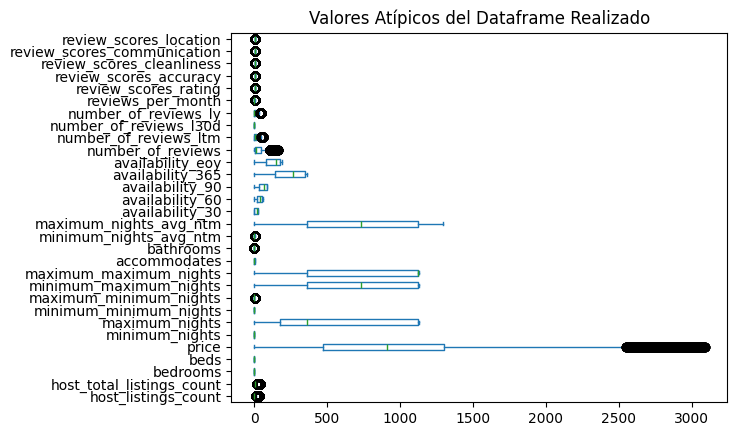

In [215]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
data4_iqr.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Realizado")
plt.show() #dibujamos el diagrama

In [216]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,host_response_rate,latitude,longitude,neighbourhood_cleansed,property_type,room_type,host_since,host_location,host_response_time,host_is_superhost,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,100.0,19.382830,-99.271780,Cuajimalpa de Morelos,Entire villa,Entire home/apt,2010-06-28,"Mexico City, Mexico",within an hour,f,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90
1,100.0,19.411620,-99.177940,Cuauhtémoc,Entire home,Entire home/apt,2010-08-09,"Mexico City, Mexico",within an hour,f,...,65.0,1.0,0.0,0.0,0.39,4.59,4.56,4.70,4.78,4.98
2,100.0,19.439770,-99.156050,Cuauhtémoc,Entire condo,Entire home/apt,2010-10-19,"Mexico City, Mexico",within a few hours,f,...,84.0,1.0,0.0,0.0,0.48,4.87,4.95,4.88,4.94,4.76
3,100.0,19.411520,-99.168570,Cuauhtémoc,Entire rental unit,Entire home/apt,2011-01-04,"Mexico City, Mexico",within a few hours,f,...,50.0,1.0,0.0,4.0,0.30,4.90,4.82,4.76,4.92,4.98
4,100.0,19.354480,-99.162170,Coyoacán,Entire rental unit,Entire home/apt,2010-08-24,"Mexico City, Mexico",within a few hours,t,...,132.0,8.0,0.0,9.0,0.81,4.92,4.91,4.96,4.98,4.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,100.0,19.490670,-99.174150,Azcapotzalco,Entire condo,Entire home/apt,2018-01-28,"Mexico City, Mexico",within an hour,f,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,4.90
26397,100.0,19.391438,-99.181881,Benito Juárez,Entire rental unit,Entire home/apt,2020-07-24,"Mexico City, Mexico",within an hour,f,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90
26398,100.0,19.419767,-99.175294,Cuauhtémoc,Entire rental unit,Entire home/apt,2024-08-04,"Mexico City, Mexico",within an hour,t,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90
26399,100.0,19.441713,-99.161810,Cuauhtémoc,Entire loft,Entire home/apt,2014-11-25,"Mexico City, Mexico",within an hour,f,...,0.0,0.0,0.0,0.0,0.00,4.80,4.80,4.80,4.90,4.90


In [217]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

host_response_rate               0
latitude                         0
longitude                        0
neighbourhood_cleansed           0
property_type                    0
room_type                        0
host_since                     914
host_location                    0
host_response_time               1
host_is_superhost                0
host_has_profile_pic           914
host_identity_verified         914
bathrooms_text                   0
amenities                        0
has_availability                 0
host_listings_count              0
host_total_listings_count        0
bedrooms                         0
beds                             0
price                            0
minimum_nights                   0
maximum_nights                   0
minimum_minimum_nights           0
maximum_minimum_nights           0
minimum_maximum_nights           0
maximum_maximum_nights           0
accommodates                     0
bathrooms                        0
minimum_nights_avg_n

In [218]:
Datos_limpios['host_response_rate'].unique()

array([100.,  93.,   0.,  91.,  90.,  29.,  89.,  97.,  67.,  80.,  33.,
        75.,  95.,  50.,  58.,  78.,  92.,  86.,  60.,  85.,  99.,  30.,
        63.,  70.,  79.,  40.,  25.,  88.,  87.,  13.,  20.,  71.,  96.,
        38.,  81.,  98.,  84.,  10.,  73.,  94.,  64.,  82.,  83.,  34.,
        77.,  55.,   6.,  56.,  59.,  74.,  14.,  57.,  76.,  11.,   9.,
        17.,   8.,  22.,  12.,  42.,   7.,   4.,  68.,  62.,  43.])

In [219]:
Datos_limpios.to_csv("MÉXICO_SinValoresAtípicos.csv", index=False)  